In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/Bai Tap 1/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **MISSING VALUE**

In [3]:
#kiểm tra phần trăm missing value của data
round(data.isnull().sum()/len(data),5)

PassengerId    0.00000
Survived       0.00000
Pclass         0.00000
Name           0.00000
Sex            0.00000
Age            0.19865
SibSp          0.00000
Parch          0.00000
Ticket         0.00000
Fare           0.00000
Cabin          0.77104
Embarked       0.00224
dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


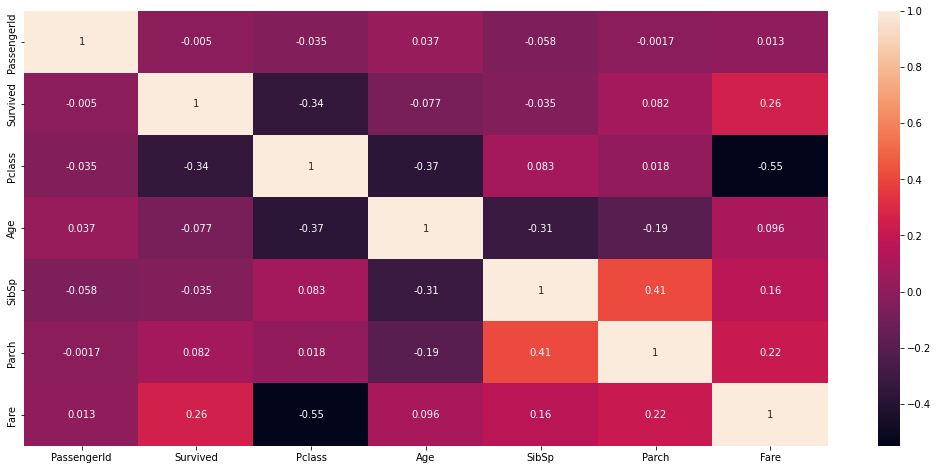

In [5]:
#kiểm tra độ tương quan của các cột với nhau.
plt.figure(figsize = (18, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#vì cột cabin có missing value chiếm 77% nên ta có thể bỏ cột cabin đi. các cột name và ticket không cần thiết cho quá trình phân tích và ML nên ta bỏ đi.
data.drop(columns= {'Cabin', 'Name','Ticket'}, axis = 1, inplace = True)

In [8]:
#x = data.iloc[::].values

In [9]:
#imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
#x[:, 5:6] = imputer.fit_transform(x[:, 5:6])


In [10]:
#imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
#x[:, :-1] = imputer.fit_transform(x[:, :-1])

In [11]:
#x

In [12]:
data["Embarked"].mode() 

0    S
dtype: object

In [13]:
#đối với missing value của cột age ta có thể thay thế bằng giá trị mean(), còn cột embarked thì thay thế bằng mod() vì cột embarked là object nên không dùng mean()
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna('S')

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [15]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


# **LABEL ENCODING**

In [16]:
binary_cols = [col for col in data.columns if data[col].dtype not in ["int64", "float64"]
               and data[col].nunique() == 2]

In [17]:
print(binary_cols)

['Sex']


In [18]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
for col in binary_cols:
    data = label_encoder(data, col)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


# **ONEHOT ENCODING**


In [19]:
cate_col = [col for col in data.columns if 10 >= data[col].nunique() > 2]

In [20]:
print(cate_col)

['Pclass', 'SibSp', 'Parch', 'Embarked']


In [21]:
def one_hot_encode_df(df, columns_to_encode):
    encoder = OneHotEncoder()
    one_hot_dfs = []
    for column in columns_to_encode:
        one_hot = encoder.fit_transform(df[[column]])
        one_hot = one_hot.toarray()
        column_names = encoder.get_feature_names([column])
        one_hot_df = pd.DataFrame(one_hot, columns=column_names)
        one_hot_dfs.append(one_hot_df)
        
    one_hot_df = pd.concat(one_hot_dfs, axis=1)
    df = pd.concat([df, one_hot_df], axis=1)
    df = df.drop(columns_to_encode, axis=1)
    
    return df

data = one_hot_encode_df(data, [col for col in data.columns if 10 >= data[col].nunique() > 2])
print(data)


     PassengerId  Survived  Sex        Age     Fare  Pclass_1  Pclass_2  \
0              1         0    1  22.000000   7.2500       0.0       0.0   
1              2         1    0  38.000000  71.2833       1.0       0.0   
2              3         1    0  26.000000   7.9250       0.0       0.0   
3              4         1    0  35.000000  53.1000       1.0       0.0   
4              5         0    1  35.000000   8.0500       0.0       0.0   
..           ...       ...  ...        ...      ...       ...       ...   
886          887         0    1  27.000000  13.0000       0.0       1.0   
887          888         1    0  19.000000  30.0000       1.0       0.0   
888          889         0    0  29.699118  23.4500       0.0       0.0   
889          890         1    1  26.000000  30.0000       1.0       0.0   
890          891         0    1  32.000000   7.7500       0.0       0.0   

     Pclass_3  SibSp_0  SibSp_1  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0         1.0      0.0 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [22]:
data.head()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.0,7.2500,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0,38.0,71.2833,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,0,26.0,7.9250,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0,35.0,53.1000,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,1,35.0,8.0500,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **SCALE**

In [23]:
scaler    = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data[['Age', 'Fare']]),
                         columns = ['age_norm', 'fare_norm'])

data_norm = pd.concat([data_norm, data], axis = 1, ignore_index = False)
print(data_norm.head())

   age_norm  fare_norm  PassengerId  Survived  Sex   Age     Fare  Pclass_1  \
0 -0.592481  -0.502445            1         0    1  22.0   7.2500       0.0   
1  0.638789   0.786845            2         1    0  38.0  71.2833       1.0   
2 -0.284663  -0.488854            3         1    0  26.0   7.9250       0.0   
3  0.407926   0.420730            4         1    0  35.0  53.1000       1.0   
4  0.407926  -0.486337            5         0    1  35.0   8.0500       0.0   

   Pclass_2  Pclass_3  ...  Parch_0  Parch_1  Parch_2  Parch_3  Parch_4  \
0       0.0       1.0  ...      1.0      0.0      0.0      0.0      0.0   
1       0.0       0.0  ...      1.0      0.0      0.0      0.0      0.0   
2       0.0       1.0  ...      1.0      0.0      0.0      0.0      0.0   
3       0.0       0.0  ...      1.0      0.0      0.0      0.0      0.0   
4       0.0       1.0  ...      1.0      0.0      0.0      0.0      0.0   

   Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0      0.0      

In [24]:
data_norm.drop(columns = {'Age', 'Fare'}, axis = 1, inplace = True)
data_norm.head()

,age_norm,fare_norm,PassengerId,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,-0.502445,1,0,1,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.638789,0.786845,2,1,0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.284663,-0.488854,3,1,0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.407926,0.420730,4,1,0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.407926,-0.486337,5,0,1,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
data_norm.head()

,age_norm,fare_norm,PassengerId,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,-0.502445,1,0,1,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.638789,0.786845,2,1,0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.284663,-0.488854,3,1,0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.407926,0.420730,4,1,0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.407926,-0.486337,5,0,1,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
